## Preprocessing and EDA

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

interactions = pd.read_csv('./interactions/RAW_interactions.csv')

In [3]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [4]:
interactions = interactions.dropna(axis=0, inplace=False)

#### User ID

In [5]:
# There are a bunch of reviews, but the ratio of users to reviews is a about 1:5 

unique_users = interactions['user_id'].nunique()
total_reviews = len(interactions['user_id'])


print("Unique Users: ", unique_users)
print("Total Reviews: ", total_reviews)

Unique Users:  226419
Total Reviews:  1132198


Maximum Reivews per User:  7671
Minimum Reivews per User:  1
Mean Reviews per User:  5.000454908819489
Median Reviews per User:  1.0
Standard Deviation of Reviews per User:  49.67953565579594
Number of users with less than 20 reviews:  213933
As a percentage:  0.9448544512607158


Text(0, 0.5, 'Number of Users')

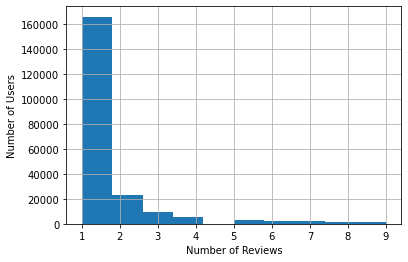

In [6]:
# Let's see what the distribution of reviews is like wrt the user that wrote it: 

reviews_by_user = interactions.groupby('user_id').agg('count').sort_values(by='review', ascending=False)
max_user_reviews = reviews_by_user['review'].max()
min_user_reviews = reviews_by_user['review'].min()
mean_user_reviews = reviews_by_user['review'].mean()
median_user_reviews = reviews_by_user['review'].median()
stdev_user_reviews = reviews_by_user['review'].std()

print("Maximum Reivews per User: ", max_user_reviews)
print("Minimum Reivews per User: ", min_user_reviews)
print("Mean Reviews per User: ", mean_user_reviews)
print("Median Reviews per User: ", median_user_reviews)
print("Standard Deviation of Reviews per User: ", stdev_user_reviews)

# Histogram for the majority of users
most_of_the_reviews = reviews_by_user['review'].where(reviews_by_user['review'] < 10).dropna()
print("Number of users with less than 20 reviews: ", len(most_of_the_reviews))
print("As a percentage: ", len(most_of_the_reviews)/unique_users)
ax = most_of_the_reviews.hist()
ax.set_xlabel("Number of Reviews")
ax.set_ylabel("Number of Users")

### Recipes 

In [7]:
# Let's see how many unique recipes there are in the dataset 

num_recipes = interactions['recipe_id'].nunique()
num_reviews = len(interactions)

print("Total number of unique recipes: ", num_recipes)
print("Total number of reviews: ", num_reviews)

Total number of unique recipes:  231630
Total number of reviews:  1132198


In [8]:
# Looking at the statistics of unique recipes: 
reviews_by_recipe = interactions.groupby('recipe_id').agg('count')['review'].sort_values(ascending=False)
max_recipe_reviews = reviews_by_recipe.max()
min_recipe_reviews = reviews_by_recipe.min()
mean_recipe_reviews = reviews_by_recipe.mean()
median_recipe_reviews = reviews_by_recipe.median()
stdev_recipe_reviews = reviews_by_recipe.std()

print("Maximum Reivews per Recipe: ", max_recipe_reviews)
print("Minimum Reivews per Recipe: ", min_recipe_reviews)
print("Mean Reviews per Recipe: ", mean_recipe_reviews)
print("Median Reviews per Recipe: ", median_recipe_reviews)
print("Standard Deviation of Reviews per Recipe: ", stdev_recipe_reviews)

Maximum Reivews per Recipe:  1609
Minimum Reivews per Recipe:  1
Mean Reviews per Recipe:  4.887959245348185
Median Reviews per Recipe:  2.0
Standard Deviation of Reviews per Recipe:  17.527729929844032


Number of recipes with less than 20 reviews:  223649
As a percentage:  0.9655441868497172


Text(0, 0.5, 'Number of Recipes')

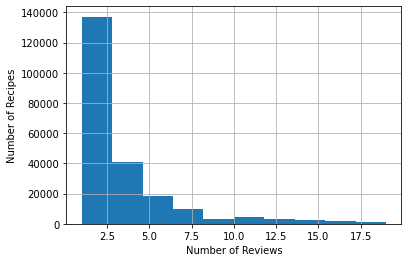

In [9]:
# Distribution of Unique Recipes 

most_recipes = reviews_by_recipe.where(reviews_by_recipe < 20).dropna()
print("Number of recipes with less than 20 reviews: ", len(most_recipes))
print("As a percentage: ", len(most_recipes)/num_recipes)
recipe_ax = most_recipes.hist()
recipe_ax.set_xlabel("Number of Reviews")
recipe_ax.set_ylabel("Number of Recipes")

### Date

In [10]:
import datetime as dt

first_date = min(interactions['date'])
last_date = max(interactions['date'])

print("First Date: ", first_date)
print("Last Date: ", last_date)

First Date:  2000-01-25
Last Date:  2018-12-20


In [11]:
# Let's gather statistics on the dates 

timeseries = interactions.groupby('date').agg('count')['review']

print("Total number of dates: ", len(timeseries))

max_date = timeseries.max()
min_date = timeseries.min()
mean_date = timeseries.mean()
median_date = timeseries.median()
stdev_date = timeseries.std()

print("Maximum reviews in a single day: ", max_date)
print("Minimum reviews in a single day: ", min_date)
print("Mean reviews in a single day: ", mean_date)
print("Median reviews in a single day: ", median_date)
print("Standard Deviation of Reviews in a Single Day: ", stdev_date)

Total number of dates:  6396
Maximum reviews in a single day:  723
Minimum reviews in a single day:  1
Mean reviews in a single day:  177.01657285803628
Median reviews in a single day:  128.0
Standard Deviation of Reviews in a Single Day:  142.69130047470105


In [12]:
# Build a few time series plots
d1 = dt.datetime(2006, 1, 25)
d2 = dt.datetime(2012, 1, 25)

dates_included = timeseries.reset_index()
dates_included['date'] = dates_included['date'].apply(lambda x: pd.to_datetime(x))
dates_included

first_ts = dates_included.where(dates_included['date'] <d1).dropna()
second_ts = dates_included.where((dates_included['date'] > d1) & (dates_included['date'] <d2)).dropna()
third_ts = dates_included.where(dates_included['date'] > d2).dropna()

<AxesSubplot:xlabel='date'>

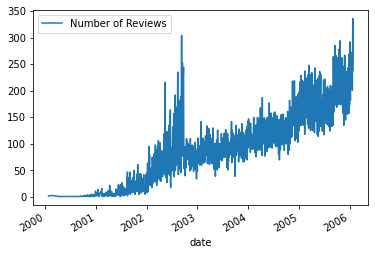

In [13]:
first_ts.rename({"review":"Number of Reviews"},axis=1).plot(x="date")

<AxesSubplot:xlabel='date'>

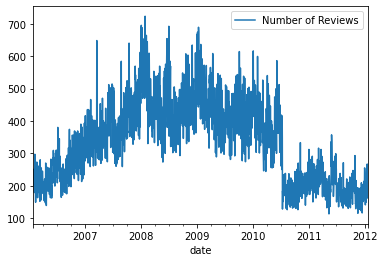

In [14]:
second_ts.rename({"review":"Number of Reviews"},axis=1).plot(x="date")

<AxesSubplot:xlabel='date'>

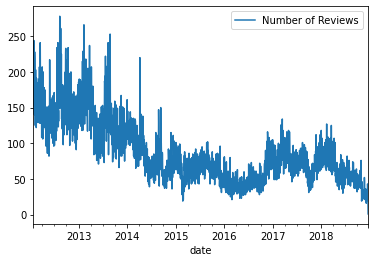

In [15]:
third_ts.rename({"review":"Number of Reviews"},axis=1).plot(x="date")

In [182]:
# Average length of each review 

interactions.review.str.len().mean()

278.40948138046525

### Rating 

<AxesSubplot:xlabel='rating'>

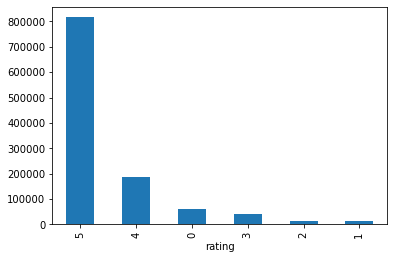

In [102]:
interactions.value_counts('rating').plot.bar(x='rating')

In [17]:
# Preprocessing Rating 

<AxesSubplot:xlabel='target'>

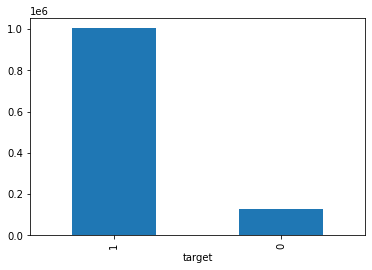

In [18]:
targets = (interactions['rating'] >= 4).astype(int)
interactions['target'] = targets
interactions.value_counts('target').plot.bar()

In [19]:
# Want to undersample majority class 

# Target = 0: 

zeros = interactions.where(interactions["target"] == 0).dropna()
ones = interactions.where(interactions["target"] == 1).dropna()
print("Proportion of negative to positive samples: ", len(zeros)/len(ones))

# I'm thinking I should sample 10-15% of the majorit class to keep things balanced and then preprocess. Less work for my GPU.


Proportion of negative to positive samples:  0.128179424888547


<AxesSubplot:>

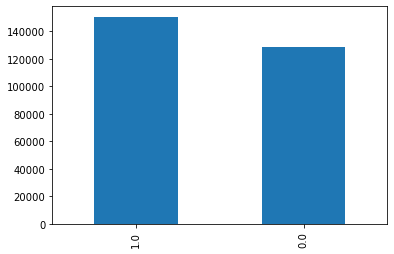

In [20]:
# Resampling 15% of the dataset for more balanced classes, much easier to work with now. 

sample = ones.sample(frac=0.15)
sample = pd.concat([zeros,sample])
sample['target'].value_counts().plot.bar()

### Preprocessing Text

In [21]:
sample = sample.reset_index().drop(['index', 'user_id', 'recipe_id', 'rating', 'date'],axis=1)
sample

,review,target
0,"Just an observation, so I will not rate. I fo...",0.0
1,This recipe was OVERLY too sweet. I would sta...,0.0
2,Made my own buttermilk w/ vinegar and milk. U...,0.0
3,This is a very good recipe. We also want to c...,0.0
4,"The ""cornbread"" on top is bland. I'd us a real...",0.0
...,...,...
279165,Thought this was much better the next day for ...,1.0
279166,"Fast, easy, delicious...great! Following the ...",1.0
279167,I was surprised at how tasty this was! I just ...,1.0
279168,very good very simple taste and easy to prepar...,1.0


In [22]:
sample["review"] = sample["review"].str.replace('[^a-zA-Z]', ' ')
sample.review[0]

'Just an observation  so I will not rate   I followed this procedure with strawberries instead of raspberries   Perhaps this is the reason it did not work well   Sorry to report that the strawberries I did in August were moldy in October   They were stored in my downstairs fridge  which is very cold and infrequently opened   Delicious and fresh tasting prior to that  though   So  keep a sharp eye on them   Personally I would not keep them longer than a month   This recipe also appears as         posted in July       which is when I tried it   I also own the Edna Lewis cookbook in which this appears '

In [23]:
sample["review"] = sample["review"].str.lower()

In [167]:
sample.review[0]

'just an observation  so i will not rate   i followed this procedure with strawberries instead of raspberries   perhaps this is the reason it did not work well   sorry to report that the strawberries i did in august were moldy in october   they were stored in my downstairs fridge  which is very cold and infrequently opened   delicious and fresh tasting prior to that  though   so  keep a sharp eye on them   personally i would not keep them longer than a month   this recipe also appears as         posted in july       which is when i tried it   i also own the edna lewis cookbook in which this appears '

In [24]:
from sklearn.model_selection import train_test_split

X = sample["review"].values
y = sample["target"].values

### Training Models 

In [190]:
# Imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [170]:
word_count_example = CountVectorizer(stop_words="english").fit(X)


In [171]:
len(word_count_example.vocabulary_)

63915

In [186]:
tfidf_example = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english').fit(X)

In [187]:
len(tfidf_example.vocabulary_)

1777780

In [198]:
# Create function to train model 

def fit_reviews(X, y, transform, model, display, roc):

    X_trans = transform.fit_transform(X)
    Xtr, Xte, ytr, yte = train_test_split(X_trans, y, test_size=0.1, random_state=42)
    classifier = model.fit(Xtr, ytr)
    acc = classifier.score(Xte, yte)
    predictions = classifier.predict(Xte)
#     precision = precision_score(y, predictions)
#     recall = recall_score(y, predictions)
#     f1 = recall_score(y, predictions)
    print("Accuracy: ", acc)
#     print("Precision: ", precision)
#     print("Recall: ", recall)
#     print("F1-Score: ", f1)
    
#     conf_matrix = confusion_matrix(y, predictions)
#     print("Confusion Matrix: ", conf_matrix)
    
    
    
    
    # Find out about the words that the model was messing around with 
    if(display == 1):
        w = transform.get_feature_names()
        coefficients = classifier.coef_.tolist()[0]
        word_weights = pd.DataFrame({'Word' : w, 'Coefficient' : coefficients})
        word_weights = word_weights.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('10 most positive words:')
        print(word_weights.head(10))
        print('')
        print('10 most negative words:')        
        print(word_weights.tail(10))
    
    # Display ROC curve to evaluate model
    if(roc==1):
        plot_roc_curve(model, Xte, yte)
        plt.show()
    
    return acc


Model accuracy:  0.5042447254361142


C:\Users\Benra\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


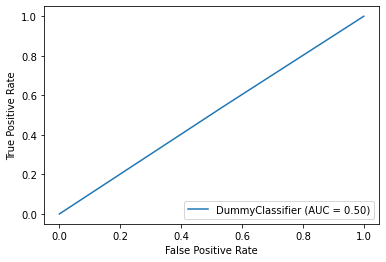

0.5042447254361142

In [164]:
# Baseline results using dummy classifier with raw TFIDF

dummy = DummyClassifier()
tf = TfidfVectorizer()
fit_reviews(X, y, tf, dummy, 0, 1)

### k-NN Model 

In [135]:
Xtr_tf = TfidfVectorizer().fit_transform(X)
Xtr_knn, Xte_knn, ytr_knn, yte_knn = train_test_split(Xtr_tf, y, test_size=0.1, random_state=42)

In [50]:
Xtr_knn

<251253x64221 sparse matrix of type '<class 'numpy.float64'>'
	with 9425400 stored elements in Compressed Sparse Row format>

In [51]:
print(Xtr_knn.shape[0])
print(Xte_knn.shape[0])

251253
27917


In [80]:
# Using Count Vectorizer 

# k_range = range(1,10)
# my_param_grid = dict(n_neighbors = k_range)

knn =  KNeighborsClassifier(n_neighbors=7)
knn.fit(Xtr_knn, ytr_knn)


# my_grid = GridSearchCV(knn, my_param_grid, cv=5, scoring='accuracy')

# my_grid.fit(Xtr_knn, ytr_knn)

# print(my_grid.best_score_)
# print(my_grid.best_params_)

KNeighborsClassifier(n_neighbors=7)

In [81]:
knn.score(Xte_knn, yte_knn)

0.4771644517677401

### Testing out different arrangements using SVD

In [99]:
# Truncated SVD

from sklearn.decomposition import TruncatedSVD

knn = KNeighborsClassifier(n_neighbors=5)
svd = TruncatedSVD(n_components = 10, random_state=42)
reduced = svd.fit_transform(Xtr_tf)

X_svd_tr, X_svd_te, y_svd_tr, y_svd_te = train_test_split(reduced, y, test_size=0.1, random_state=42)

knn.fit(X_svd_tr, y_svd_tr)

KNeighborsClassifier()

In [100]:
knn.score(X_svd_te, y_svd_te)

0.7044811405236953

In [126]:
# Highest so far: 0.733

In [127]:
results = []

for i in range(525, 535):
    knn = KNeighborsClassifier(n_neighbors=i)
    svd = TruncatedSVD(n_components=4, random_state=42)
    reduced = svd.fit_transform(Xtr_tf)
    X_svd_tr, X_svd_te, y_svd_tr, y_svd_te = train_test_split(reduced, y, test_size=0.1, random_state=42)
    knn.fit(X_svd_tr, y_svd_tr)
    results.append((i, knn.score(X_svd_te, y_svd_te)))
    

In [128]:
results

[(20, 0.7212451194612601),
 (21, 0.722140631156643),
 (22, 0.72239137443135),
 (23, 0.7231077837876563),
 (24, 0.7229286814485797),
 (25, 0.7247913457749758),
 (26, 0.7241465773543002),
 (27, 0.7256152165347279),
 (28, 0.7245047820324534),
 (29, 0.7256868574703585)]

In [107]:
results2 = []

for j in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=531)
    svd = TruncatedSVD(n_components=j, random_state=42)
    reduced = svd.fit_transform(Xtr_tf)
    X_svd_tr, X_svd_te, y_svd_tr, y_svd_te = train_test_split(reduced, y, test_size=0.1, random_state=42)
    knn.fit(X_svd_tr, y_svd_tr)
    results2.append((j, knn.score(X_svd_te, y_svd_te)))

In [111]:
results2

[(2, 0.5235161371207508),
 (3, 0.6722427194899165),
 (4, 0.703872192570835),
 (5, 0.7079557259017802),
 (6, 0.7150481785292115),
 (7, 0.713364616541892),
 (8, 0.7111795680051581),
 (9, 0.7140093849625676),
 (9, 0.7176630726797292)]

### Model Training (ORGANIZED)

1) Logistic Regression: 
    (a) Dummy w/ Count Vectorizer 
    (b) LR w/ Count Vectorizer 
        (i) 5 possible values for Reg Coeff
    (c) LR w/ TFIDF 
        (i) 5 possible values for Reg Coeff
    (d) LR w/ TFIDF + 2-gram
        (i) 10 possible values for Reg Coeff
2) KNN 
    (a) Use Truncated SVD for all examples (best score w/out was only 50% accurate)
        (i) Use 5-fold CV to determine best value of K (ranging from 525 to 535)
        (ii)

In [140]:
# 1) Logistic Regression: 

lr_result_array = []

In [141]:
# (a) Baseline using dummy classifier 
lr_result_array.append(("Baseline",fit_reviews(X, y, CountVectorizer(stop_words="english"), DummyClassifier(), 0, 1)))
lr_result_array

Model accuracy:  0.5067521581831859


[('Baseline', 0.5067521581831859)]

In [142]:
c = CountVectorizer(stop_words = "english")
tfidf_raw = TfidfVectorizer()
tfidf_2 = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')

In [143]:
# (b) LR / Count Vectorizer 

for i in [0.25, 0.5, 0.75, 1, 2.5, 5, 7.5]:
    lr_result_array.append(("LR/CountVec, C=" + str(i),fit_reviews(X, y, c, 
        LogisticRegression(penalty='l2', C = i, max_iter=200, solver="saga"), 1, 0)))


C:\Users\Benra\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Model accuracy:  0.7871547802414299

10 most positive words:
        Word  Coefficient
       thanx     1.170112
         zwt     1.159931
  refreshing     1.093144
      kitten     0.956614
   excellent     0.914011
 outstanding     0.826017
    roxygirl     0.788022
        prmr     0.779888
      thanks     0.752781
   wonderful     0.750280

10 most negative words:
          Word  Coefficient
          rate    -1.135179
      terrible    -1.187652
 disappointing    -1.236949
         worst    -1.274733
     potential    -1.304465
        sounds    -1.351456
            ok    -1.358212
         bland    -1.448266
          okay    -1.544718
         sorry    -1.735363


C:\Users\Benra\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Model accuracy:  0.7871906007092453

10 most positive words:
        Word  Coefficient
       thanx     1.192284
         zwt     1.168459
  refreshing     1.109495
      kitten     0.979455
   excellent     0.915495
 outstanding     0.833580
    roxygirl     0.811994
        prmr     0.799117
      tagged     0.758180
      thanks     0.752060

10 most negative words:
          Word  Coefficient
        lacked    -1.150120
      terrible    -1.215232
 disappointing    -1.272106
         worst    -1.311496
     potential    -1.337216
        sounds    -1.363508
            ok    -1.364947
         bland    -1.453787
          okay    -1.557968
         sorry    -1.745845


C:\Users\Benra\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Model accuracy:  0.7871906007092453

10 most positive words:
        Word  Coefficient
       thanx     1.199692
         zwt     1.171294
  refreshing     1.115173
      kitten     0.987875
   excellent     0.915978
 outstanding     0.836105
    roxygirl     0.821605
        prmr     0.804737
      tagged     0.763502
   skeptical     0.752574

10 most negative words:
          Word  Coefficient
        lacked    -1.159788
      terrible    -1.225414
 disappointing    -1.283864
         worst    -1.324768
     potential    -1.348082
            ok    -1.367222
        sounds    -1.367601
         bland    -1.455696
          okay    -1.562508
         sorry    -1.749424


C:\Users\Benra\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Model accuracy:  0.7871906007092453

10 most positive words:
        Word  Coefficient
       thanx     1.203274
         zwt     1.172839
  refreshing     1.118142
      kitten     0.991980
   excellent     0.916202
 outstanding     0.837384
    roxygirl     0.823944
        prmr     0.808180
      tagged     0.767413
        tour     0.755161

10 most negative words:
          Word  Coefficient
        lacked    -1.164309
      terrible    -1.230195
 disappointing    -1.289837
         worst    -1.331340
     potential    -1.353658
            ok    -1.368391
        sounds    -1.369675
         bland    -1.456640
          okay    -1.564833
         sorry    -1.751251


C:\Users\Benra\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Model accuracy:  0.7871547802414299

10 most positive words:
        Word  Coefficient
       thanx     1.210556
         zwt     1.175352
  refreshing     1.123107
      kitten     0.999867
   excellent     0.916660
 outstanding     0.839811
    roxygirl     0.831783
        prmr     0.814800
      tagged     0.773313
        tour     0.760422

10 most negative words:
          Word  Coefficient
        lacked    -1.172526
      terrible    -1.239197
 disappointing    -1.299796
         worst    -1.343626
     potential    -1.363996
            ok    -1.370454
        sounds    -1.373482
         bland    -1.458260
          okay    -1.568944
         sorry    -1.754555


C:\Users\Benra\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Model accuracy:  0.7871189597736147

10 most positive words:
        Word  Coefficient
       thanx     1.212927
         zwt     1.176456
  refreshing     1.125026
      kitten     1.002486
   excellent     0.916819
 outstanding     0.840548
    roxygirl     0.833815
        prmr     0.816053
      tagged     0.774275
        tour     0.762064

10 most negative words:
          Word  Coefficient
        lacked    -1.175304
      terrible    -1.241712
 disappointing    -1.303614
         worst    -1.346832
     potential    -1.367499
            ok    -1.371082
        sounds    -1.374692
         bland    -1.458933
          okay    -1.570243
         sorry    -1.755576
Model accuracy:  0.7871906007092453

10 most positive words:
        Word  Coefficient
       thanx     1.213575
         zwt     1.176738
  refreshing     1.125473
      kitten     1.002189
   excellent     0.916832
 outstanding     0.840806
    roxygirl     0.835513
        prmr     0.817350
      tagged     0.774477

C:\Users\Benra\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [144]:
lr_result_array

[('Baseline', 0.5067521581831859),
 ('LR/CountVec, C=0.25', 0.7871547802414299),
 ('LR/CountVec, C=0.5', 0.7871906007092453),
 ('LR/CountVec, C=0.75', 0.7871906007092453),
 ('LR/CountVec, C=1', 0.7871906007092453),
 ('LR/CountVec, C=2.5', 0.7871547802414299),
 ('LR/CountVec, C=5', 0.7871189597736147),
 ('LR/CountVec, C=7.5', 0.7871906007092453)]

In [145]:
# (c) LR / TFIDF

for i in [0.25, 0.5, 0.75, 1, 2.5, 5, 7.5]:
    lr_result_array.append(("LR/Raw TFIDF, C=" + str(i),fit_reviews(X, y, tfidf_raw, 
        LogisticRegression(penalty='l2', C = i, max_iter=200, solver="saga"), 1, 0)))


Model accuracy:  0.7956084106458431

10 most positive words:
      Word  Coefficient
    thanks     6.075194
     great     4.971585
       zwt     4.201185
   perfect     4.153957
 wonderful     4.148627
      used     3.932853
     loved     3.721845
 delicious     3.555082
       tag     3.483547
   enjoyed     3.448807

10 most negative words:
          Word  Coefficient
 unfortunately    -3.355545
        sounds    -3.466545
  disappointed    -3.563018
          rate    -3.586902
        rating    -3.777693
           not    -4.622957
          okay    -5.273854
            ok    -5.585701
         bland    -6.499130
         sorry    -7.501841
Model accuracy:  0.7958233334527349

10 most positive words:
      Word  Coefficient
    thanks     6.122478
     great     5.105821
       zwt     4.840949
   perfect     4.300301
 wonderful     4.274400
      used     3.938517
       tag     3.918812
     thanx     3.866380
     loved     3.817535
 delicious     3.646088

10 most negative

In [146]:
lr_result_array

[('Baseline', 0.5067521581831859),
 ('LR/CountVec, C=0.25', 0.7871547802414299),
 ('LR/CountVec, C=0.5', 0.7871906007092453),
 ('LR/CountVec, C=0.75', 0.7871906007092453),
 ('LR/CountVec, C=1', 0.7871906007092453),
 ('LR/CountVec, C=2.5', 0.7871547802414299),
 ('LR/CountVec, C=5', 0.7871189597736147),
 ('LR/CountVec, C=7.5', 0.7871906007092453),
 ('LR/Raw TFIDF, C=0.25', 0.7956084106458431),
 ('LR/Raw TFIDF, C=0.5', 0.7958233334527349),
 ('LR/Raw TFIDF, C=0.75', 0.7956800515814737),
 ('LR/Raw TFIDF, C=1', 0.7938890281907082),
 ('LR/Raw TFIDF, C=2.5', 0.7914174159114518),
 ('LR/Raw TFIDF, C=5', 0.7891965469069026),
 ('LR/Raw TFIDF, C=7.5', 0.7870831393057993)]

In [147]:
# (d) LR / TFIDF + 2-grams

for i in [0.25, 0.5, 0.75, 1, 2.5, 5, 7.5]:
    lr_result_array.append(("LR/TFIDF+2gram, C=" + str(i),fit_reviews(X, y, tfidf_2, 
        LogisticRegression(penalty='l2', C = i, max_iter=200, solver="saga"), 1)))



Model accuracy:  0.7903786223448078

10 most positive words:
      Word  Coefficient
    thanks    10.702150
      used     6.738868
     loved     6.185797
 wonderful     6.075360
     great     5.955122
       zwt     5.894818
   perfect     5.871654
   enjoyed     5.086987
       tag     4.888179
    keeper     4.741025

10 most negative words:
         Word  Coefficient
       rating    -4.268728
          bad    -4.298641
    just didn    -4.371431
          dry    -4.439617
 disappointed    -4.551380
        maybe    -5.074756
         okay    -6.774354
           ok    -7.790009
        bland    -8.967377
        sorry    -9.337500
Model accuracy:  0.7922054662033886

10 most positive words:
      Word  Coefficient
    thanks    11.370284
       zwt     7.332604
      used     6.866961
     loved     6.528825
 wonderful     6.385942
   perfect     6.182642
       tag     5.834863
     great     5.801669
   enjoyed     5.575583
    keeper     5.199599

10 most negative words:
   

In [149]:
lr_result_array

[('Baseline', 0.5067521581831859),
 ('LR/CountVec, C=0.25', 0.7871547802414299),
 ('LR/CountVec, C=0.5', 0.7871906007092453),
 ('LR/CountVec, C=0.75', 0.7871906007092453),
 ('LR/CountVec, C=1', 0.7871906007092453),
 ('LR/CountVec, C=2.5', 0.7871547802414299),
 ('LR/CountVec, C=5', 0.7871189597736147),
 ('LR/CountVec, C=7.5', 0.7871906007092453),
 ('LR/Raw TFIDF, C=0.25', 0.7956084106458431),
 ('LR/Raw TFIDF, C=0.5', 0.7958233334527349),
 ('LR/Raw TFIDF, C=0.75', 0.7956800515814737),
 ('LR/Raw TFIDF, C=1', 0.7938890281907082),
 ('LR/Raw TFIDF, C=2.5', 0.7914174159114518),
 ('LR/Raw TFIDF, C=5', 0.7891965469069026),
 ('LR/Raw TFIDF, C=7.5', 0.7870831393057993),
 ('LR/TFIDF+2gram, C=0.25', 0.7903786223448078),
 ('LR/TFIDF+2gram, C=0.5', 0.7922054662033886),
 ('LR/TFIDF+2gram, C=0.75', 0.7933875416412939),
 ('LR/TFIDF+2gram, C=1', 0.7943546942723072),
 ('LR/TFIDF+2gram, C=2.5', 0.7928860550918795),
 ('LR/TFIDF+2gram, C=5', 0.7884801375505964),
 ('LR/TFIDF+2gram, C=7.5', 0.7853637568506645)

In [148]:
# (2) KNN 
knn_result_array = []

In [151]:
# (a) Transform w truncated svd, let #componetns be small to get rid of curse of dimensionality for knn 

for i in range(525, 535):
    knn = KNeighborsClassifier(n_neighbors=i)
    tsvd = TruncatedSVD(n_components=4, random_state=42)
    reduced = tsvd.fit_transform(Xtr_tf)
    X_svd_tr, X_svd_te, y_svd_tr, y_svd_te = train_test_split(reduced, y, test_size=0.1, random_state=42)
    knn.fit(X_svd_tr, y_svd_tr)
    knn_result_array.append(("KNN w k=" + str(i), knn.score(X_svd_te, y_svd_te)))

In [152]:
knn_result_array

[('KNN w k=525', 0.733137514775943),
 ('KNN w k=526', 0.7331733352437583),
 ('KNN w k=527', 0.733137514775943),
 ('KNN w k=528', 0.7331016943081277),
 ('KNN w k=529', 0.7332449761793889),
 ('KNN w k=530', 0.733137514775943),
 ('KNN w k=531', 0.7333524375828349),
 ('KNN w k=532', 0.7331016943081277),
 ('KNN w k=533', 0.733137514775943),
 ('KNN w k=534', 0.7332091557115736)]

### Using TFIDF/NGRAM + TSVD + REGULARIZED LOGREG

In [160]:
# Add TSVD to the original fit_review function, let's try to do the AUC stuff here 

def fit_reduced_reviews(X, y, transform, model, roc):

    X_trans = transform.fit_transform(X)
    tsvd = TruncatedSVD(n_components=15, random_state=42)
    reduced = tsvd.fit_transform(X_trans)
    Xtr, Xte, ytr, yte = train_test_split(reduced, y, test_size=0.1, random_state=42)
    
    # Implementing grid search cv here 
    
#     coeff = range(1, 5)
#     param_grid = dict(C=coeff)
    
#     grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
#     grid.fit(Xtr, ytr)
    
#     # Testing 
    
#     clf_lr = LogisticRegression(penalty='l2', C=grid.best_params_['C'])
#     classifier = clf_lr.fit(Xtr, Ytr)

#     acc = classifier.score(Xte, yte)
    classifier = model.fit(Xtr, ytr)
    acc = classifier.score(Xte, yte)
    
    print("Model accuracy: ", acc)

#     targets = classifier.predict(Xte)
    
    if(roc == 1):
        plot_roc_curve(model, Xte, yte)
        plt.show()
        
    return acc


Model accuracy:  0.7291972633162589


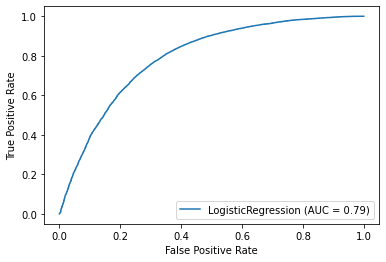

0.7291972633162589

In [163]:
fit_reduced_reviews(X, y, tfidf_2, LogisticRegression(penalty='l2', C = 1, max_iter=200, solver="saga"), 1)

### Compiling Results

C:\Users\Benra\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy:  0.7873697030483218

10 most positive words:
              Word  Coefficient
56343        thanx     1.203578
63906          zwt     1.172913
45867   refreshing     1.118149
30196       kitten     0.992589
18971    excellent     0.916193
39461  outstanding     0.837414
47735     roxygirl     0.824990
43556         prmr     0.808555
55228       tagged     0.767970
50951    skeptical     0.755204

10 most negative words:
                Word  Coefficient
30734         lacked    -1.164498
56123       terrible    -1.229462
15752  disappointing    -1.290577
62638          worst    -1.330393
42884      potential    -1.353584
38585             ok    -1.368360
52120         sounds    -1.369644
5525           bland    -1.456611
38590           okay    -1.564767
52072          sorry    -1.751281


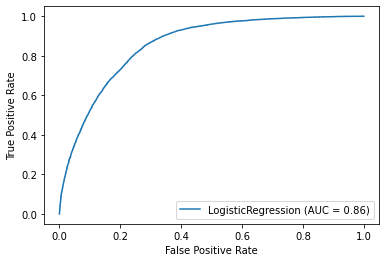

Accuracy:  0.7958591539205502

10 most positive words:
            Word  Coefficient
56544     thanks     6.122487
23980      great     5.105739
64212        zwt     4.840935
41369    perfect     4.300357
62698  wonderful     4.274414
60069       used     3.938529
55449        tag     3.918817
56574      thanx     3.866348
32659      loved     3.817495
14743  delicious     3.646043

10 most negative words:
                Word  Coefficient
43082      potential    -3.980717
15816   disappointed    -4.001970
59517  unfortunately    -4.041952
45232           rate    -4.166943
45248         rating    -4.448421
38054            not    -4.638829
38769           okay    -6.134400
38764             ok    -6.196818
5576           bland    -7.140322
52297          sorry    -8.637573


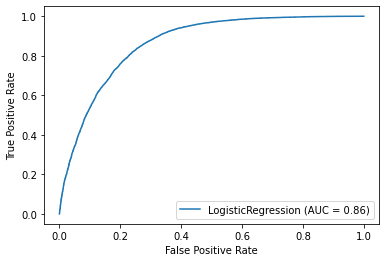

Accuracy:  0.7873697030483218

10 most positive words:
              Word  Coefficient
1560542     thanks     9.244063
1664123       used     6.163523
660511       great     5.620945
893231       loved     5.453101
1739059  wonderful     5.191113
1112160    perfect     4.937936
393032   delicious     4.350577
496503     enjoyed     4.173946
1557973      thank     4.002871
1777374        zwt     3.934112

10 most negative words:
                 Word  Coefficient
1424131        sounds    -3.170589
430636   disappointed    -3.171632
76751             bad    -3.258642
1630736           try    -3.570565
463100            dry    -3.580397
931788          maybe    -4.241973
1042881          okay    -4.694378
1041494            ok    -5.808838
133123          bland    -6.649880
1421343         sorry    -6.798201


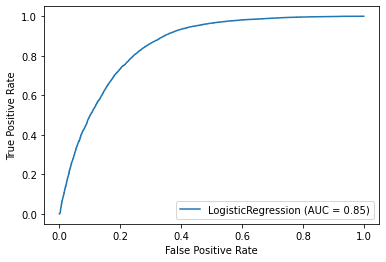

Model Accuracy:  0.7333524375828349


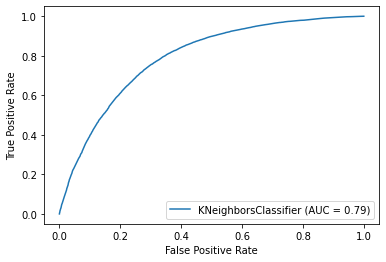

In [199]:
# Winners Circle 

# Log Reg w Word Count (C=1)
fit_reviews(X, y, c, LogisticRegression(penalty='l2', C = 1, max_iter=200, solver="saga"), 1, 1)

# Log Reg w RAW TF (C = 0.5)
fit_reviews(X, y, tfidf_raw, LogisticRegression(penalty='l2', C = 0.5, max_iter=200, solver="saga"), 1, 1)

# Log Reg w TF/NGRAM (C = 1)
fit_reviews(X, y, tfidf_2, LogisticRegression(penalty='l2', C = 0.1, max_iter=200, solver="saga"), 1, 1)

# KNN (k = 531)
knn = KNeighborsClassifier(n_neighbors=531)
tsvd = TruncatedSVD(n_components=4, random_state=42)
reduced = tsvd.fit_transform(Xtr_tf)
X_svd_tr, X_svd_te, y_svd_tr, y_svd_te = train_test_split(reduced, y, test_size=0.1, random_state=42)
knn.fit(X_svd_tr, y_svd_tr)
print("Model Accuracy: ", knn.score(X_svd_te, y_svd_te))
plot_roc_curve(knn, X_svd_te, y_svd_te)
plt.show()